##### CNN is used to match stock price difference from previous day trading data along with features created by technical indicators

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
from numpy import expand_dims

In [2]:
df = pd.read_csv('data_model.csv', header=0, parse_dates=[0])
df_cleaned = df.dropna()
df_cleaned.head(5)

,Date,Diff,Close-Open,High-Low,RSI,Close-EMA,MACD-Signal,ADX,CCI,NormATR,Close-BBup,Close-BBmid,Close-BBlow,Diff_t+1
33,2021-06-14,12.50,20.45,216.55,71.283947,220.522136,-11.062793,30.701480,73.768483,1.013346,-58.001894,66.97,191.941894,57.40
34,2021-06-15,57.40,2.30,59.20,72.757895,240.865852,-10.284952,30.241329,131.489399,0.977958,-60.536263,98.54,257.616264,-101.70
35,2021-06-16,-101.70,-79.95,138.25,66.267762,120.610405,-18.454491,29.063859,86.183101,0.976589,-118.251497,-29.60,59.051497,-76.15
36,2021-06-17,-76.15,43.10,152.60,61.821008,38.532351,-30.131212,27.133862,-3.409170,0.980699,-213.266636,-96.48,20.306636,-8.05
37,2021-06-18,-8.05,-73.15,310.60,61.352321,26.418037,-38.979394,25.979041,-73.215266,1.052577,-223.182481,-81.33,60.522481,63.15


In [3]:
sc = MinMaxScaler()

X_scale_dataset = sc.fit_transform(df_cleaned.iloc[:,1:-1])
# X_scale_dataset = df_cleaned.iloc[:,1:-1].to_numpy()
y_dataset = df_cleaned.iloc[:,-1].to_numpy()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_scale_dataset, y_dataset, train_size=0.7, random_state=42, shuffle=False)

In [5]:
X_train_arr = []
for i in range(X_train.shape[0]-11):
    arr=[]
    for j in range(12):
        arr.append(X_train[i+j,:])
    X_train_arr.append(np.array(arr))
    
X_train_arr = np.array(X_train_arr)

In [6]:
y_train_arr = []
for i in range(11, y_train.shape[0]):
    if y_train[i]>0:
        y_train_arr.append(np.array([1.0,0.0]))
    else:
        y_train_arr.append(np.array([0.0,1.0]))
        
y_train_arr = np.array(y_train_arr)

In [7]:
X_test_arr = []
for i in range(X_test.shape[0]-11):
    arr=[]
    for j in range(12):
        arr.append(X_test[i+j,:])
    X_test_arr.append(np.array(arr))
    
X_test_arr = np.array(X_test_arr)

In [8]:
y_test_arr = []
for i in range(11, y_test.shape[0]):
    if y_test[i]>0:
        y_test_arr.append(np.array([1.0,0.0]))
    else:
        y_test_arr.append(np.array([0.0,1.0]))
        
y_test_arr = np.array(y_test_arr)

In [9]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_train_arr.shape)
print(y_train_arr.shape)
print(X_test_arr.shape)
print(y_test_arr.shape)

(149, 12)
(149,)
(65, 12)
(65,)
(138, 12, 12)
(138, 2)
(54, 12, 12)
(54, 2)


In [10]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(12, 12, 1), padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 12, 12, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 6, 6, 32)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 4, 4, 64)          18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 2, 2, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               3

In [11]:
model.compile(
  'adam',
  loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'],
)

X_train_arr = expand_dims(X_train_arr, axis=-1)
history = model.fit(X_train_arr, y_train_arr, epochs=100)

Epoch 1/100


c:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


5/5 [==============================] - 1s 4ms/step - loss: 0.6919 - accuracy: 0.5580
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 0.6875 - accuracy: 0.5725
Epoch 3/100
5/5 [==============================] - 0s 5ms/step - loss: 0.6787 - accuracy: 0.5725
Epoch 4/100
5/5 [==============================] - 0s 5ms/step - loss: 0.6780 - accuracy: 0.5725
Epoch 5/100
5/5 [==============================] - 0s 6ms/step - loss: 0.6774 - accuracy: 0.5725
Epoch 6/100
5/5 [==============================] - 0s 5ms/step - loss: 0.6703 - accuracy: 0.5725
Epoch 7/100
5/5 [==============================] - 0s 5ms/step - loss: 0.6729 - accuracy: 0.5725
Epoch 8/100
5/5 [==============================] - 0s 5ms/step - loss: 0.6633 - accuracy: 0.5725
Epoch 9/100
5/5 [==============================] - 0s 5ms/step - loss: 0.6683 - accuracy: 0.5725
Epoch 10/100
5/5 [==============================] - 0s 5ms/step - loss: 0.6653 - accuracy: 0.6014
Epoch 11/100
5/5 [=======================

<AxesSubplot:>

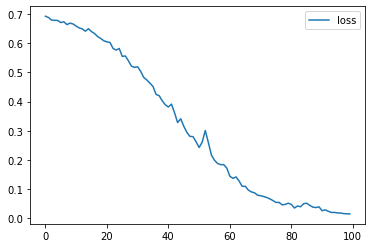

In [12]:
metrics_df = pd.DataFrame(history.history)
metrics_df[["loss"]].plot()

In [13]:
X_test_arr = expand_dims(X_test_arr, axis=-1)
pred_arr = model.predict(X_test_arr)

cce = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
cce(y_test_arr, pred_arr).numpy()

2/2 [==============================] - 0s 3ms/step


0.8244109

In [14]:
test_pred_arr=[]
for x in pred_arr:
    if x[0]>0.5:
        test_pred_arr.append(1)
    else:
        test_pred_arr.append(0)
        
actual_test_arr = []
for x in y_test_arr:
    if x[0]>0:
        actual_test_arr.append(1)
    else:
        actual_test_arr.append(0)

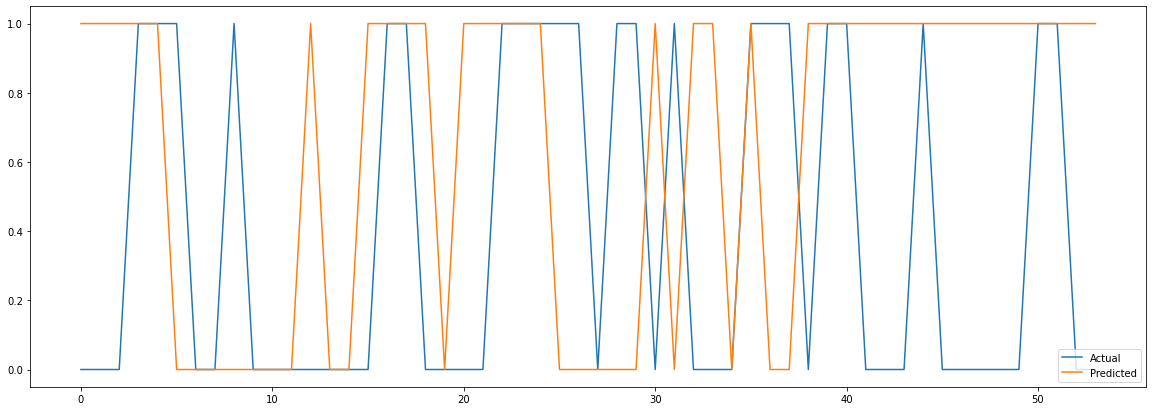

Directional accuracy percentage: 42.592592592592595


In [15]:
plt.figure(figsize=(20,7))
plt.plot(actual_test_arr)
plt.plot(test_pred_arr)
plt.legend(["Actual", "Predicted"], loc ="lower right")
plt.show()

z=0
for i in range(len(actual_test_arr)):
    if actual_test_arr[i]==test_pred_arr[i]:
        z=z+1

print("Directional accuracy percentage:", z/len(actual_test_arr)*100)